In [1]:
import numpy as np
np.random.seed(39)
#import tqdm
import mikutoolkit as miku
from matplotlib import pyplot as plt
plt.style.use("solarized-light")
#plt.xkcd()

あなたもミクと創ろう、世界を繋ごう。


In [2]:
Instances_王明輝_應用數值分析 = {
    "P21-2.2": {
        "Scatter Points":np.array([
            (1., 0.),
            (4., 1.386294),
            (6., 1.791759),
            (5., 1.609438),
            ]),
        },
    "P34-2.4": {
        "Scatter Points": np.array([
            (3.,  2.5),
            (4.5, 1.),
            (7.,  2.5),
            (9.,   .5),
            ]),
        },
    "P37-2.5": {
        "Scatter Points": np.array([
            (  0,   0),
            ( 20,  20),
            ( 40,  20),
            ( 56,  38),
            ( 68,  80),
            ( 80, 100),
            ( 84, 100),
            ( 96, 100),
            (104, 125),
            (110, 125),
            ]),
        },
    "P57-3.4": {
        "Scatter Points": np.array([
            (-1.,   -.2209),
            ( -.75,  .3295),
            ( -.5,   .8826),
            ( -.25, 1.4329),
            ( 0.,   2.0003),
            (  .25, 2.5645),
            (  .5,  3.1334),
            (  .75, 3.7601),
            ( 1.,   4.2836),
            ]),
        },
    "P92-4.2": {
        "Bounds": (0., 1.),
        "Vals": [
            1.,
             .9973978,
             .9896158,
             .9767267,
             .958851,
             .9361556,
             .9088516,
             .8771925,
             .8414709,
            ],
        },
    }

## Poly Interpolation (多項式插值)

### Poly Lagrange (`Lagrange`多項式)

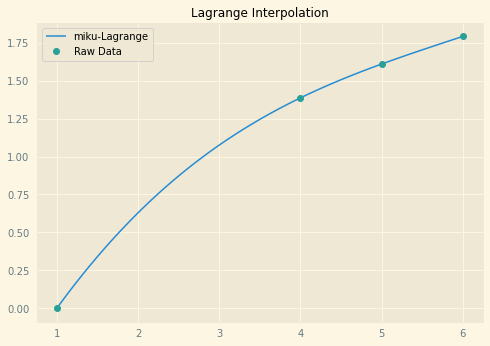

In [3]:
polyint_lagrange = miku.heartland.orbitdance.poly_lagrange(Instances_王明輝_應用數值分析["P21-2.2"]["Scatter Points"])
polyint_lagrange.plot(np.linspace(1., 6., 100, endpoint=True), label="miku-Lagrange")
plt.plot(Instances_王明輝_應用數值分析["P21-2.2"]["Scatter Points"][ : , 0 ], Instances_王明輝_應用數值分析["P21-2.2"]["Scatter Points"][ : , 1 ], "o", label="Raw Data")
plt.legend()
plt.title("Lagrange Interpolation")
plt.show()

### Poly Newton (`Newton`多項式)

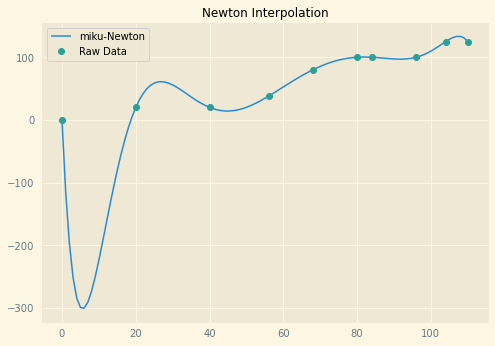

In [4]:
polyint_newton = miku.heartland.orbitdance.poly_lagrange(Instances_王明輝_應用數值分析["P37-2.5"]["Scatter Points"])
polyint_newton.plot(np.arange(111), label="miku-Newton")
plt.plot(Instances_王明輝_應用數值分析["P37-2.5"]["Scatter Points"][ : , 0 ], Instances_王明輝_應用數值分析["P37-2.5"]["Scatter Points"][ : , 1 ], "o", label="Raw Data")
plt.legend()
plt.title("Newton Interpolation")
plt.show()

## Runge Phenomenon (`Runge`現象)

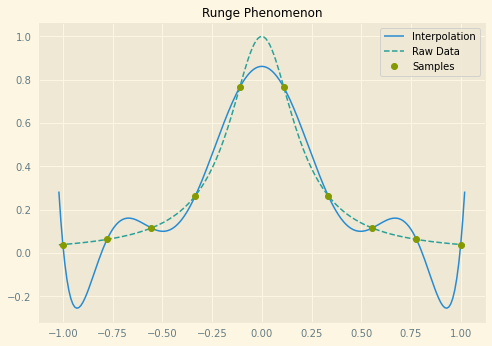

In [5]:
f_runge = lambda x : 1. / (1. + 25. * (x ** 2))
runge_scatters = np.zeros(( 10 , 2 ))
runge_scatters[ : , 0 ] += np.linspace(-1., 1., 10, endpoint=True)
runge_scatters[ : , 1 ] += f_runge(runge_scatters[ : , 0 ])
polyrungeint = miku.heartland.orbitdance.poly_newton(runge_scatters)
runge_x = np.arange(-1.02, 1.02 + .01, .01)
polyrungeint.plot(runge_x, label="Interpolation")
plt.plot(runge_x, f_runge(runge_x), "--", label="Raw Data")
plt.plot(runge_scatters[ : , 0 ], runge_scatters[ : , 1 ], "o", label="Samples")
plt.legend()
plt.title("Runge Phenomenon")
plt.show()

## Spline Interpolation ((三次)樣條插值)

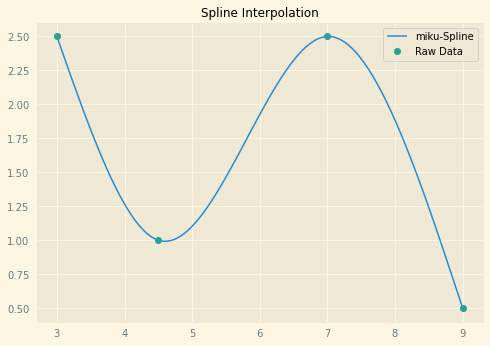

In [6]:
spline3 = miku.heartland.orbitdance.spline_interpolate(Instances_王明輝_應用數值分析["P34-2.4"]["Scatter Points"])
spline3.plot(np.linspace(3., 9., 100, endpoint=True), label="miku-Spline")
plt.plot(Instances_王明輝_應用數值分析["P34-2.4"]["Scatter Points"][ : , 0 ], Instances_王明輝_應用數值分析["P34-2.4"]["Scatter Points"][ : , 1 ], "o", label="Raw Data")
plt.legend()
plt.title("Spline Interpolation")
plt.show()

### Spline vs. Poly

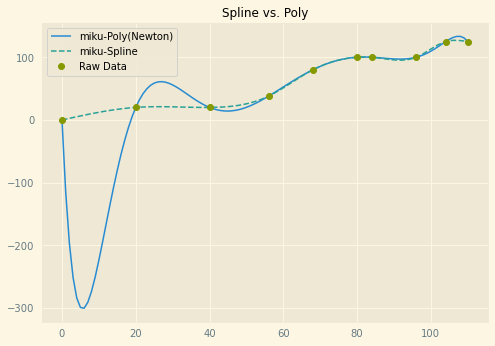

In [7]:
intpoly = miku.heartland.orbitdance.poly_newton(Instances_王明輝_應用數值分析["P37-2.5"]["Scatter Points"])
intspline = miku.heartland.orbitdance.spline_interpolate(Instances_王明輝_應用數值分析["P37-2.5"]["Scatter Points"])
intpoly.plot(np.arange(111), "-", label="miku-Poly(Newton)")
intspline.plot(np.arange(111), "--", label="miku-Spline")
plt.plot(Instances_王明輝_應用數值分析["P37-2.5"]["Scatter Points"][ : , 0 ], Instances_王明輝_應用數值分析["P37-2.5"]["Scatter Points"][ : , 1 ], "o", label="Raw Data")
plt.legend()
plt.title("Spline vs. Poly")
plt.show()

## `Hermite` Interpolation

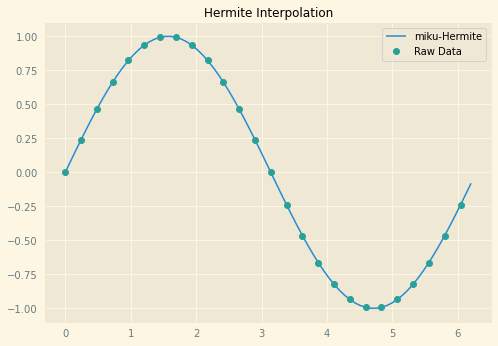

In [8]:
hermite_x = np.arange(0., np.pi * 2, np.pi / 39)
hermite_arr = np.zeros(( len(hermite_x) , 3 ))
hermite_arr[ : , 0 ] += hermite_x
hermite_arr[ : , 1 ] += np.sin(hermite_x)
hermite_arr[ : , 2 ] += np.cos(hermite_x) * (.3)
hermitest = miku.heartland.orbitdance.hermite_interpolate(hermite_arr)
hermitest.plot(hermite_x, label="miku-Hermite")
plt.plot(hermite_arr[ :: 3 , 0 ], hermite_arr[ :: 3 , 1 ], "o", label="Raw Data")
plt.legend()
plt.title("Hermite Interpolation")
plt.show()

## Composite Integration (複化積分)

In [9]:
print(miku.heartland.fomalhaut.composite_integrate( # 複化·梯形
    Instances_王明輝_應用數值分析["P92-4.2"]["Bounds"],
    Instances_王明輝_應用數值分析["P92-4.2"]["Vals"],
    ))
print(miku.heartland.fomalhaut.composite_integrate( # 複化·辛普森
    Instances_王明輝_應用數值分析["P92-4.2"]["Bounds"],
    Instances_王明輝_應用數值分析["P92-4.2"]["Vals"],
    "Simpson"
    ))

0.9456908062499998
0.9460832541666665


## Poly Least Square Regression (多項式`最小平方`逼近)

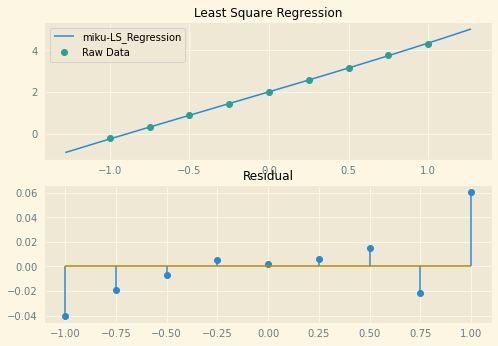

In [10]:
reg = miku.heartland.fomalhaut.leastsquare_regress(Instances_王明輝_應用數值分析["P57-3.4"]["Scatter Points"])
with plt.rc_context({}):
    plt.subplot(211)
    reg.plot(np.arange(-1.28, 1.28, .01), label="miku-LS_Regression")
    plt.plot(
        Instances_王明輝_應用數值分析["P57-3.4"]["Scatter Points"][ : , 0 ],
        Instances_王明輝_應用數值分析["P57-3.4"]["Scatter Points"][ : , 1 ],
        "o", label="Raw Data"
        )
    plt.legend()
    plt.title("Least Square Regression")
    plt.subplot(212)
    plt.stem(
        Instances_王明輝_應用數值分析["P57-3.4"]["Scatter Points"][ : , 0 ],
        [ (reg(Instances_王明輝_應用數值分析["P57-3.4"]["Scatter Points"][ k , 0 ]) - Instances_王明輝_應用數值分析["P57-3.4"]["Scatter Points"][ k , 1 ]) for k in range(Instances_王明輝_應用數值分析["P57-3.4"]["Scatter Points"].shape[0]) ],
        )
    plt.title("Residual")
    plt.plot()

## More...